### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

# Flower Power! Simple Neural Network For Predicing Iris Species
### The following code depicts an ANN developed by following along with Linkedin Learning courses. The parameters and data are identical. 

In [1]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [2]:
iris_data = pd.read_csv('noahiris.csv', header=0)

In [3]:
#Encoding the species label for use as a feature
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

In [4]:
#Converting data to Numpy object and spliting into features and targets
np_iris_data = iris_data.to_numpy()
X = np_iris_data[:, 0:4]
y = np_iris_data[:, 4]

In [5]:
#Scaling the features
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [6]:
#Scaling the target variable - using keras method to avoid later hitches
y = tf.keras.utils.to_categorical(y, 3)

In [7]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
folds = [X_train, X_test, y_train, y_test]
for fold in folds:
    print(fold.shape)

(135, 4)
(15, 4)
(135, 3)
(15, 3)


In [9]:
#Defining no. classes in the target variable
NB_CLASSES=3

In [10]:
#Architecture of the ANN
flowerpower = tf.keras.models.Sequential()
flowerpower.add(keras.layers.Dense(128, 
                                   input_shape=(4,), 
                                   name='Hidden_Layer_1', 
                                   activation='relu'))
flowerpower.add(keras.layers.Dense(128, 
                                   name='Hidden_Layer_2', 
                                   activation='relu'))
flowerpower.add(keras.layers.Dense(NB_CLASSES, 
                                   input_shape=(4,), 
                                   name='OUTPUT', 
                                   activation='softmax'))                

In [11]:
flowerpower.compile(loss='categorical_crossentropy', metrics=['accuracy'])
flowerpower.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 128)               640       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 128)               16512     
                                                                 
 OUTPUT (Dense)              (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Creating a list fo variables for references
#VERBOSE=1
#BATCH_SIZE=16
#EPOCHS=10
#VALIDATION_SPLIT=0.1

Epoch 1/10
7/7 [==============================] - 2s 70ms/step - loss: 0.7855 - accuracy: 0.7130 - val_loss: 0.5830 - val_accuracy: 0.8889
Epoch 2/10
7/7 [==============================] - 0s 14ms/step - loss: 0.5168 - accuracy: 0.8056 - val_loss: 0.4568 - val_accuracy: 0.8889
Epoch 3/10
7/7 [==============================] - 0s 13ms/step - loss: 0.4174 - accuracy: 0.8241 - val_loss: 0.3840 - val_accuracy: 0.8889
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3602 - accuracy: 0.8241 - val_loss: 0.3321 - val_accuracy: 0.9259
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3259 - accuracy: 0.8333 - val_loss: 0.3084 - val_accuracy: 0.9259
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.2919 - accuracy: 0.8519 - val_loss: 0.3000 - val_accuracy: 0.9630
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2724 - accuracy: 0.8704 - val_loss: 0.2787 - val_accuracy: 0.9630
Epoch 8/10
7/7 [===========

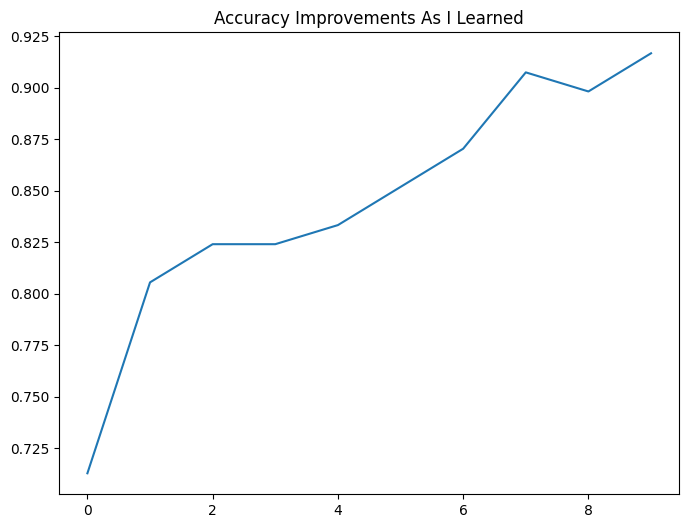

In [13]:
#Training Flower Power and vizualizing it's learning progress
fphistory=flowerpower.fit(X_train, y_train, 
                        batch_size=16,
                        epochs=10,
                        verbose=1,
                        validation_split=0.2)
#Cool idea for adding a plot to track training accuracy over each epoch
z = pd.DataFrame(fphistory.history)["accuracy"]
z.plot(figsize=(8, 6))
plt.title("Accuracy Improvements As I Learned")
plt.show()

In [14]:
#Running a quick evaluation
flowerpower.evaluate(X_test, y_test)

1/1 [==============================] - 0s 55ms/step - loss: 0.1716 - accuracy: 0.9333


[0.1716427356004715, 0.9333333373069763]

In [15]:
#Saving flowerpower for later!
flowerpower.save("Flower_Power")

INFO:tensorflow:Assets written to: Flower_Power/assets


INFO:tensorflow:Assets written to: Flower_Power/assets
